Saving quadratic_svm_dataset.csv to quadratic_svm_dataset (1).csv
Accuracy: 0.5888888888888889


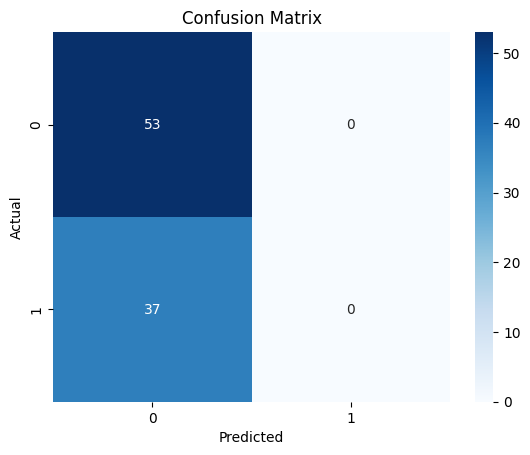

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


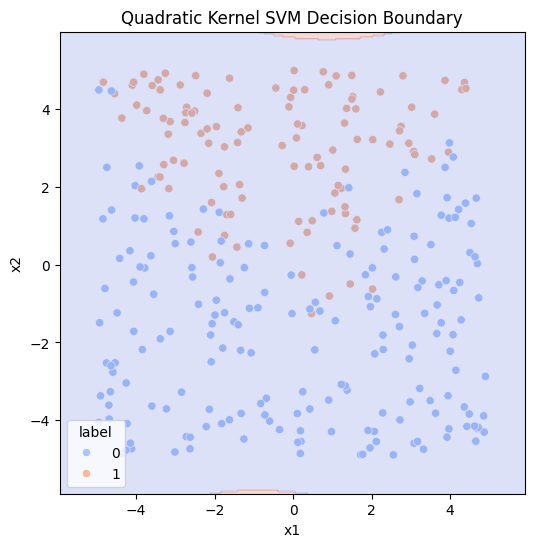

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x='x1', y='x2', hue='label', data=data, palette='coolwarm')

xx, yy = np.meshgrid(np.linspace(X.x1.min()-1, X.x1.max()+1, 300),
                     np.linspace(X.x2.min()-1, X.x2.max()+1, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title("Quadratic Kernel SVM Decision Boundary")
plt.show()


Saving spam_final_dataset.csv to spam_final_dataset.csv
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69        52
           1       0.83      0.88      0.85        98

    accuracy                           0.80       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.80      0.80      0.80       150



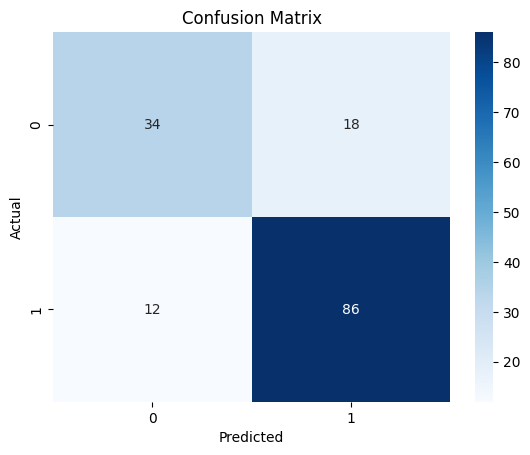

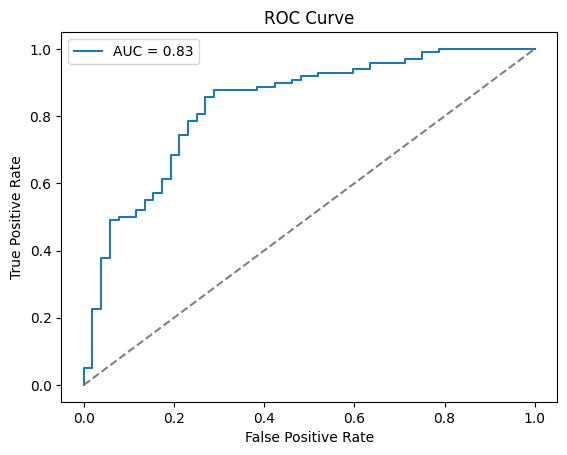

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]


data = pd.read_csv(filename)

X = data.drop(columns=["Label"])
y = data["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
